In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import backend as K

In [ ]:
def REINFORCE(y_true, y_pred):
    correct = K.argmax(y_true, axis=1)
    guess = K.argmax(y_pred, axis=1)
    reward = K.equal(correct, guess)
    baseline = K.mean(reward)
    reward = K.cast(reward, baseline.dtype)
    adv = reward - baseline
    logit = K.log(K.max(y_pred, axis=1))

    return -adv*logit

In [ ]:
batch_size = 100
nb_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_val = X_train[50000:60000, :]
X_train = X_train[:50000, :]

print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = Y_train[50000:60000]
Y_train = Y_train[:50000]
Y_test = np_utils.to_categorical(y_test, nb_classes)

X = Input(shape=(784,), name="X")

l1 = Dense(512, activation="relu")(X)
l2 = Dropout(.2)(l1)
l3 = Dense(512, activation="relu")(l2)
l4 = Dropout(.2)(l3)
out = Dense(10, activation="softmax", name="out")(l4)

model = Model(inputs=[X], outputs=[out])
model.summary()

model.compile(loss=REINFORCE, optimizer=RMSprop(), metrics=['accuracy'])

50000 train samples
10000 validation samples
10000 test samples
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X (InputLayer)              [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 out (Dense)                 (None, 10)                5130      
                                                               

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/20
500/500 [==============================] - 20s 36ms/step - loss: -0.0929 - accuracy: 0.8683 - val_loss: -0.0841 - val_accuracy: 0.9329
Epoch 2/20
500/500 [==============================] - 14s 29ms/step - loss: -0.0934 - accuracy: 0.9221 - val_loss: -0.0892 - val_accuracy: 0.9337
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: -0.0958 - accuracy: 0.9249 - val_loss: -0.0813 - val_accuracy: 0.9407
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: -0.0944 - accuracy: 0.9279 - val_loss: -0.0780 - val_accuracy: 0.9441
Epoch 5/20
500/500 [==============================] - 9s 19ms/step - loss: -0.0917 - accuracy: 0.9317 - val_loss: -0.0857 - val_accuracy: 0.9381
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: -0.0901 - accuracy: 0.9336 - val_loss: -0.0916 - val_accuracy: 0.9357
Epoch 7/20
500/500 [==============================] - 9s 19ms/step - loss: -0.0872 - accuracy: 0.9360 - val_loss: -0.0910 - val_

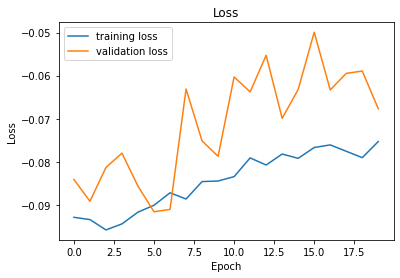

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(np.arange(0, epochs), history.history['loss'], label='training loss')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

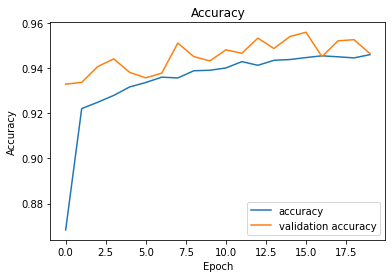

In [ ]:
fig = plt.figure()
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: -0.0767 - accuracy: 0.9374
Test score: -0.07668939977884293
Test accuracy: 0.9373999834060669


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(Y_test.argmax(1), Y_pred.argmax(1))

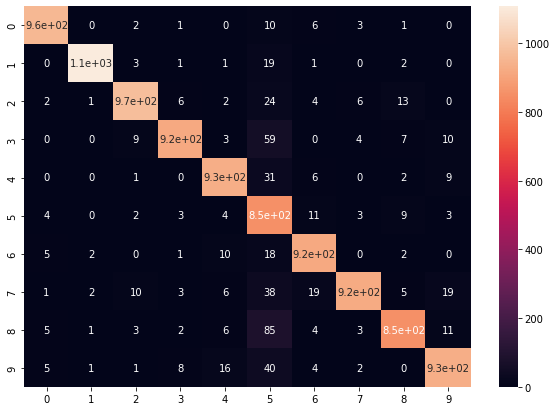

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot=True)